# SIMPLE REGRESSION (beta)


This linear model will use:  

* $ \mathbf {\hat y}  =  \hat \beta_0 + \hat \beta_1 \mathbf {\hat x} + \mathbf \epsilon $ using Sum of squares **(SS)** where $\mathbf{\hat y, \hat x, \epsilon}$ are each 15x1 vectors. 

* $ \mathbf {y = mx + b}$ 

* Matrix arithematic to calculate Least Square Error **(LSE)** 

**The data has been preloaded**

1. Build a table with columns $\mathbf x, \mathbf y, \mathbf{x - \overline x}, \mathbf{y - \overline y}, \mathbf{(x - \overline x)^2}, \mathbf{(y - \overline y)^2}$, and $\mathbf{(x - \overline x)(y - \overline y)} 
$; then compute SST ( = SSY), SSX, and SSXY by totaling columns in this table. 

2. Use $\hat \beta$'s to compute the fitted values = $\mathbf{\hat y}$, the residuals = $\mathbf{y - \hat y}$, and 
$\mathbf{\hat y - \overline y}$.  Add these three columns to a working table. Display it for *dat1, dat2, dat3*.

3. At the end display a **summary table** with three rows.  These are the columns:  DATASET = for *dat1, dat2*, *dat3*; 
$\hat \beta_0$, $\hat \beta_1$, SSE, SSR, SST (= SSY), $R^2$. 

4. Use scatter plots for visualization

### Formulas:

### Beta  hat:

$\mathbf{\hat \beta_1 = SSXY / SSX} \hspace{6cm} \mathbf{\hat \beta_0 = \overline y -  \hat \beta_1 * \overline x}$

### Sum of squares for x and y:

**SSX** = $\mathbf{\sum(x - \overline x)^2 }\hspace{5cm}$ **SSY** = $ \mathbf{\sum(y - \overline y)^2}$

**SSXY** = $\mathbf{\sum((x - \overline x)*(y - \overline y))}$

### Sum of squares for error and regression:

**SSE** = $\mathbf{\sum(yi - \hat yi)^2} \hspace{5cm}$ **SSR** = $\mathbf{\sum(\hat yi - \overline y)^2}$

$R^2$ = **SSR / SST** $\hspace{5cm}$ **Residuals** = $\mathbf{y - \hat y}$

**Start with import statments and importing data in csv files into pandas dataframes**

In [1]:
from datascience import * # used for simple tables and scatter plots by converting df() to Table()
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
np.set_printoptions(precision=4, suppress=True)

In [2]:
data_1 = pd.read_csv('dat1.csv')
data_2 = pd.read_csv('dat2.csv')
data_3 = pd.read_csv('dat3.csv')

In [3]:
def regression_plot(t,x,y):
    '''
    Takes in a table t and columns for x and y
    to plot the fit line created from
    the regression model
    '''
    colors =['red','orange','brown','green','blue','purple','black']
    n = random.randint(0,6)
    clr = colors[n]
    t.scatter(x,y)
    plt.plot(t.column(x),t.column('Y^'),color= clr)

## A. Fit first model using sum of squares calculations

**Functions for creating table and coordinating scatter plot**

A dataframe (base) containg two columns: x,y is taken in. The x and y columns are separated for calculations. Each column of calculations will be appended to the frame.  First the mean of both columns are calculated. This leads to the calculations found in the formulas found in the top of this notebook.  

In [4]:
def create_tbl(base):
    '''
    This funtion will take a dataframe and
    use formulas to obtain slope of fit line
    for the regression model. A table will be 
    created from the base once the dataframe is done 
    being modified. The table and a dictionary containing 
    calculation values will be returned
    '''
    x = base.iloc(1)[0][:]
    y = base.iloc(1)[1][:]
    xbar = x.mean()
    ybar = y.mean()
    base['x-X'] = (x - xbar)
    base['y-Y'] = (y - ybar)
    base['(x-X)sqr'] = (base['x-X'])**2
    base['(y-Y)sqr'] = (base['y-Y'])**2
    base['(X*Y)'] = (base['x-X']*base['y-Y'])
    SST = sum(base['(y-Y)sqr']) # = SSY
    SSX = sum(base['(x-X)sqr'])
    SSXY = sum(base['(X*Y)'])
    b1_hat = SSXY/SSX
    b0_hat = ybar - b1_hat*xbar
    base['Y^'] = b0_hat + b1_hat*x
    base['(y-Y^)sqr'] = (y - base['Y^'])**2
    base['(Y^-ybar)sqr'] = (base['Y^'] - ybar)**2
    SSE = sum(base['(y-Y^)sqr'])
    SSR = sum(base['(Y^-ybar)sqr'])
    Rsqr = SSR/SST  
    info = {'Xbar':xbar,'b0^': b0_hat,'b1^': b1_hat,'SSE': SSE,'SSR': SSR,'SST': SST,'R^2': Rsqr, 'ybar':ybar}
    table = Table().from_df(base)
    return table , info

In [5]:
# create tables for data and results for each file
data1 , info1 = create_tbl(data_1)
data2 , info2 = create_tbl(data_2)
data3 , info3 = create_tbl(data_3)

In [6]:
# checking sum of residual errors. They should = 0
(sum(data1['Yi']-data1['Y^'])).round(4)

0.0

In [7]:
# check output of info
info_df = pd.DataFrame([info1,info2,info3],index=['data1','data2','data3'])
info_df

,R^2,SSE,SSR,SST,Xbar,b0^,b1^,ybar
data1,0.800264,1.613981e+06,6.466590e+06,8.080571e+06,81.0,728.946667,50.656759,4832.144128
data2,0.243654,1.359282e+07,4.378870e+06,1.797169e+07,81.0,1408.337413,41.685090,4784.829729
data3,0.439244,1.438363e+07,1.126681e+07,2.565044e+07,81.0,-783.477594,66.865222,4632.605407


In [8]:
data1

Xi,Yi,x-X,y-Y,(x-X)sqr,(y-Y)sqr,(X*Y),Y^,(y-Y^)sqr,(Y^-ybar)sqr
60,3965.39,-21,-866.752,441,751259,18201.8,3768.35,38824.7,1.13165e+06
63,3760.41,-18,-1071.73,324,1.14861e+06,19291.2,3920.32,25572,831419
66,3944.34,-15,-887.803,225,788194,13317,4072.29,16371.6,577374
69,4051.71,-12,-780.435,144,609078,9365.22,4224.26,29774.8,369519
72,4504.87,-9,-327.277,81,107110,2945.49,4376.23,16546.7,207855
75,4440.55,-6,-391.595,36,153347,2349.57,4528.2,7683.28,92379.9
78,5039.77,-3,207.628,9,43109.3,-622.884,4680.17,129311,23095
81,4164.53,0,-667.61,0,445704,-0,4832.14,445704,0
84,5189.71,3,357.568,9,127855,1072.7,4984.11,42270.3,23095
87,5100.66,6,268.516,36,72100.9,1611.1,5136.08,1254.9,92379.9


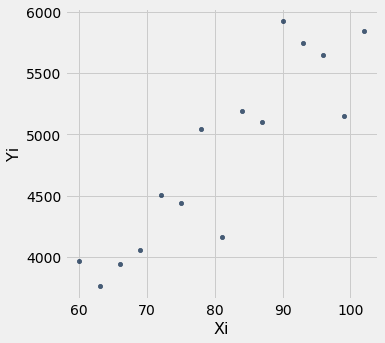

In [9]:
data1.scatter('Xi','Yi')

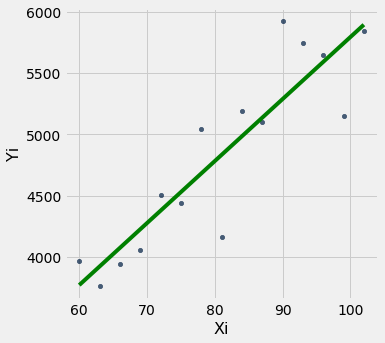

In [10]:
regression_plot(data1,'Xi','Yi')

In [11]:
data2

Xi,Yi,x-X,y-Y,(x-X)sqr,(y-Y)sqr,(X*Y),Y^,(y-Y^)sqr,(Y^-ybar)sqr
60,4880.53,-21,95.7047,441,9159.38,-2009.8,3909.44,943019,766302
63,2646.98,-18,-2137.85,324,4.57042e+06,38481.4,4034.5,1.92522e+06,562998
66,4580.02,-15,-204.811,225,41947.6,3072.17,4159.55,176791,390971
69,6035.47,-12,1250.64,144,1.5641e+06,-15007.7,4284.61,3.06551e+06,250221
72,3669.68,-9,-1115.15,81,1.24357e+06,10036.4,4409.66,547583,140749
75,4507.8,-6,-277.034,36,76747.9,1662.2,4534.72,724.879,62555.3
78,4537.85,-3,-246.983,9,61000.8,740.95,4659.77,14866.5,15638.8
81,4981.83,0,197.004,0,38810.8,0,4784.83,38810.8,0
84,2948.75,3,-1836.08,9,3.37121e+06,-5508.25,4909.88,3.84607e+06,15638.8
87,5014.28,6,229.448,36,52646.4,1376.69,5034.94,426.936,62555.3


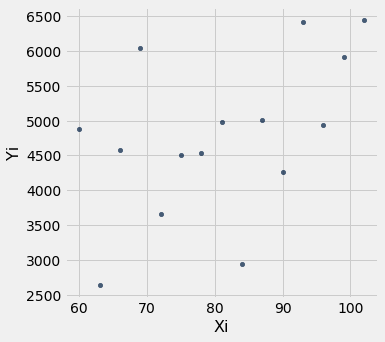

In [12]:
data2.scatter('Xi','Yi')

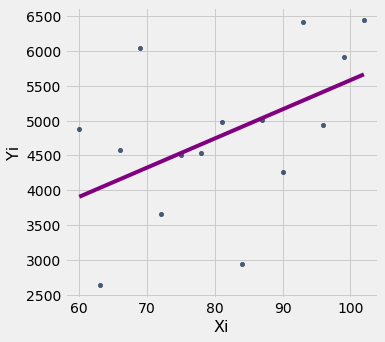

In [13]:
regression_plot(data2,'Xi','Yi')

In [14]:
data3

Xi,Yi,x-X,y-Y,(x-X)sqr,(y-Y)sqr,(X*Y),Y^,(y-Y^)sqr,(Y^-ybar)sqr
60,3654.96,-21,-977.645,441,955790,20530.6,3228.44,181923,1.97169e+06
63,3344.56,-18,-1288.05,324,1.65906e+06,23184.8,3429.03,7135.58,1.44859e+06
66,4507.2,-15,-125.407,225,15726.9,1881.11,3629.63,770131,1.00597e+06
69,3772.21,-12,-860.395,144,740280,10324.7,3830.22,3365.45,643818
72,3581.38,-9,-1051.22,81,1.10507e+06,9461.02,4030.82,201994,362148
75,1722.81,-6,-2909.8,36,8.46692e+06,17458.8,4231.41,6.2931e+06,160954
78,4482.91,-3,-149.7,9,22410,449.099,4432.01,2590.4,40238.6
81,3996.82,0,-635.781,0,404218,-0,4632.61,404218,0
84,6921.45,3,2288.84,9,5.23881e+06,6866.53,4833.2,4.36078e+06,40238.6
87,5006.28,6,373.674,36,139632,2242.04,5033.8,757.221,160954


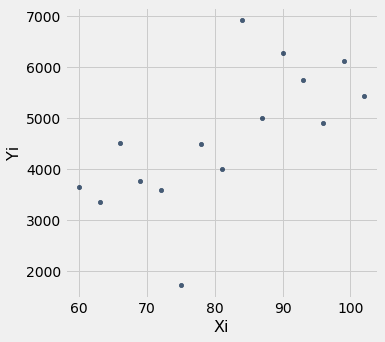

In [15]:
data3.scatter('Xi','Yi')

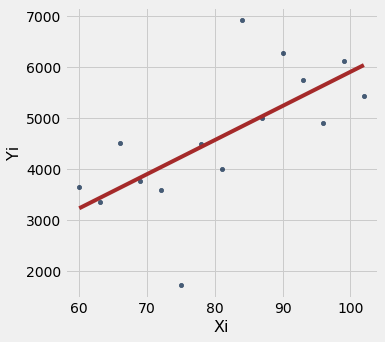

In [16]:
regression_plot(data3,'Xi','Yi')

## B. Refit model using y = mx + b

**Functions for normaliziing x, calculating correlation and slope using the datascience table of data (t) containig x and y as the argument**

In [17]:
def standard_units(a):
    '''
    Convert an array of numbers into 
    standard units
    '''
    return (a-a.mean())/a.std()

def correlation(t):
    '''
    Compute the correlation of two 
    columns 'x' and 'y' in a table t
    '''
    x = t.column(0)
    y = t.column(1)
    z_x = standard_units(x)
    z_y = standard_units(y)
    return (z_x*z_y).mean()

def reg_slope(t):
    '''
    Compute slope using standard deviations
    of x and y in the table
    '''
    r = correlation(t)
    sdX = t.column(0).std()
    sdY = t.column(1).std()
    return r*sdY/sdX

def reg_intercept(t):
    '''
    Compute intercept using
    ybar - r * stdy/stdx * xbar
    '''
    r = correlation(t)
    sdX = t.column(0).std()
    sdY = t.column(1).std()
    meanX = t.column(0).mean()
    meanY = t.column(1).mean()
    return meanY - r*(sdY/sdX)*meanX

def fit(t):
    '''
    Call previous functions
    to create a fit line 
    using mx + b
    '''
    m = reg_slope(t)
    b = reg_intercept(t)
    x = t.column(0)
    return m * x + b

**Functions for creating table 2 summary**

In [18]:
def sum_tbl(base):
    '''
    will create an info dictionary
    using 
    '''
    t = Table().from_df(base)
    x = t.column(0)
    y = t.column(1)
    xbar = x.mean()
    ybar = y.mean()
    b1_hat = reg_slope(t)
    b0_hat = reg_intercept(t)
    yhat = b0_hat + b1_hat*x
    SSE = sum((y - yhat)**2)
    SSR = sum((yhat-ybar)**2)
    SST = sum((y - ybar)**2)
    Rsqr = SSR/SST
    info = {'b0^': b0_hat,'b1^': b1_hat,'SSE': SSE,'SSR': SSR,'SST': SST,'R^2': Rsqr, 'Xbar':xbar, 'ybar':ybar}
    return info

In [19]:
# creates objects from previous function
info2_1 = sum_tbl(data_1)
info2_2 = sum_tbl(data_2)
info2_3 = sum_tbl(data_3)
info2_df = pd.DataFrame([info2_1,info2_2,info2_3],index=['data1','data2','data3'])

## C.  Fit the model using the matrix formula for the LSE's

$\mathbf{\hat \beta = (X^T X)^{-1} X^T}$

In [20]:
def matrix_fit(base):
    '''
    creates info dictionary using
    matrix formula to obtain results
    '''
    t = Table().from_df(base)
    x = t.column(0)
    y = t.column(1)
    xbar = x.mean()
    ybar = y.mean()
    X = np.asarray([[1 for x in range(15)],list(x)]).transpose()
    XTX = np.dot(X.transpose(),X)
    inverse = np.linalg.inv(XTX)
    b_hat = np.dot(np.dot(inverse,X.transpose()),y)
    yhat = b_hat[0] + b_hat[1]*x
    SSE = sum((y - yhat)**2)
    SSR = sum((yhat-ybar)**2)
    SST = sum((y - ybar)**2)
    Rsqr = SSR/SST
    info = {'b0^': b_hat[0],'b1^': b_hat[1],'SSE': SSE,'SSR': SSR,'SST': SST,'R^2': Rsqr}
    return info

In [21]:
# creates objects from previous function
info3_1 = matrix_fit(data_1)
info3_2 = matrix_fit(data_2)
info3_3 = matrix_fit(data_3)
info3_df = pd.DataFrame([info3_1,info3_2,info3_3],index=['data1','data2','data3'])

***Display results of each method (A, B, C)***

In [22]:
info_df

,R^2,SSE,SSR,SST,Xbar,b0^,b1^,ybar
data1,0.800264,1.613981e+06,6.466590e+06,8.080571e+06,81.0,728.946667,50.656759,4832.144128
data2,0.243654,1.359282e+07,4.378870e+06,1.797169e+07,81.0,1408.337413,41.685090,4784.829729
data3,0.439244,1.438363e+07,1.126681e+07,2.565044e+07,81.0,-783.477594,66.865222,4632.605407


In [23]:
info2_df

,R^2,SSE,SSR,SST,Xbar,b0^,b1^,ybar
data1,0.800264,1.613981e+06,6.466590e+06,8.080571e+06,81.0,728.946667,50.656759,4832.144128
data2,0.243654,1.359282e+07,4.378870e+06,1.797169e+07,81.0,1408.337413,41.685090,4784.829729
data3,0.439244,1.438363e+07,1.126681e+07,2.565044e+07,81.0,-783.477594,66.865222,4632.605407


In [24]:
info3_df

,R^2,SSE,SSR,SST,b0^,b1^
data1,0.800264,1.613981e+06,6.466590e+06,8.080571e+06,728.946667,50.656759
data2,0.243654,1.359282e+07,4.378870e+06,1.797169e+07,1408.337413,41.685090
data3,0.439244,1.438363e+07,1.126681e+07,2.565044e+07,-783.477594,66.865222
